In [263]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from keras.optimizers import SGD
from keras import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# fix random seed for reproducibility
numpy.random.seed(7)
var_w=lambda shape: initializers.RandomUniform(-0.5,0.5)

In [281]:
# load pima indians dataset
dataset = pd.read_csv("/Users/malush/Desktop/projet AFD 2018/train_cap2018.csv", sep=",")
# split into input (X) and output (Y) variables
scaler = StandardScaler()
X=dataset.iloc[:,1:59].astype(float)
Y=dataset.iloc[:,59]
print(X)

#X, X_test, Y, Y_test = train_test_split(X, Y)
w = np.isnan(X)
X[w] = 0#X.mean() à changer
w2= np.isnan(X_test)
X_test[w2] = 0

#Normalisation 

scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)

# Now apply the transformations to the data:
X = scaler.transform(X)
X_test = scaler.transform(X_test)




       sentences  words  letters.all  syllables  punct  avg.sentc.length  \
0           16.0  233.0       1116.0      363.0   32.0         14.562500   
1            7.0  180.0        866.0      268.0   18.0         25.714286   
2           10.0  180.0        861.0      269.0   20.0         18.000000   
3           10.0  180.0        872.0      281.0   20.0         18.000000   
4           11.0  187.0        849.0      283.0   29.0         17.000000   
5            9.0  180.0        857.0      272.0   24.0         20.000000   
6            5.0  130.0        607.0      197.0   15.0         26.000000   
7            9.0  183.0        717.0      229.0   24.0         20.333333   
8           11.0  185.0        788.0      251.0   42.0         16.818182   
9            9.0  157.0        641.0      208.0   20.0         17.444444   
10           5.0  104.0        440.0      148.0   12.0         20.800000   
11          21.0  377.0       1698.0      562.0   41.0         17.952381   
12          

In [265]:
Y.shape

(27310,)

In [266]:
#Pour encoder Y
encoder = LabelEncoder()
encoder.fit(Y)
#converti le Y de chaine de caractères à numérique
Y_numerique = encoder.transform(Y)

print(Y_numerique)
# convert integers to dummy variables (i.e. one hot encoded)
y_encode_binaire = np_utils.to_categorical(Y_numerique)#6

print(y_encode_binaire)

[5 5 5 ... 0 0 0]
[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [267]:
print(y_encode_binaire)

[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [282]:
X #exemple X


array([[ 2.76657574,  3.93245254,  4.54008689, ..., -1.31592026,
        -0.10833058, -0.29768432],
       [ 0.23533113,  2.65752488,  3.17149855, ..., -0.82367704,
         0.02625278, -0.34571468],
       [ 1.07907934,  2.65752488,  3.14412678, ..., -0.0360879 ,
         0.6852724 , -1.16367995],
       ...,
       [-1.17091587, -1.19131333, -1.22440721, ...,  1.73598767,
         0.81985576, -0.7802652 ],
       [-0.32716767, -1.02292666, -0.98353566, ...,  1.24374445,
         0.26616225, -0.39550477],
       [-1.45216528, -0.75831903, -0.61675398, ..., -0.13453654,
        -0.6554412 ,  0.47856494]])

In [291]:

# create model
model = Sequential()
model.add(Dense(50, input_dim=58,kernel_initializer='normal', activation='relu'))#

model.add(Dense(500, activation='relu'))
model.add(Dense(6,kernel_initializer='normal', activation='softmax'))# a revoir la fct


In [292]:

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])

In [293]:
# Fit the model
model.fit(X, y_encode_binaire, epochs=100, batch_size=32)

Epoch 1/100
27310/27310 [==============================] - 3s 98us/step - loss: 0.7090 - acc: 0.7277
Epoch 2/100
27310/27310 [==============================] - 2s 74us/step - loss: 0.5903 - acc: 0.7719
Epoch 3/100
27310/27310 [==============================] - 2s 74us/step - loss: 0.5546 - acc: 0.7865
Epoch 4/100
27310/27310 [==============================] - 2s 75us/step - loss: 0.5321 - acc: 0.7959
Epoch 5/100
27310/27310 [==============================] - 2s 75us/step - loss: 0.5167 - acc: 0.8012
Epoch 6/100
27310/27310 [==============================] - 2s 75us/step - loss: 0.5036 - acc: 0.8084
Epoch 7/100
27310/27310 [==============================] - 2s 74us/step - loss: 0.4946 - acc: 0.8119
Epoch 8/100
27310/27310 [==============================] - 2s 73us/step - loss: 0.4821 - acc: 0.8160
Epoch 9/100
27310/27310 [==============================] - 2s 74us/step - loss: 0.4742 - acc: 0.8179
Epoch 10/100
27310/27310 [==============================] - 2s 75us/step - loss: 0.4655 - a

27310/27310 [==============================] - 2s 75us/step - loss: 0.2495 - acc: 0.9048
Epoch 82/100
27310/27310 [==============================] - 2s 74us/step - loss: 0.2479 - acc: 0.9053
Epoch 83/100
27310/27310 [==============================] - 2s 75us/step - loss: 0.2468 - acc: 0.9065
Epoch 84/100
27310/27310 [==============================] - 2s 82us/step - loss: 0.2438 - acc: 0.9074
Epoch 85/100
27310/27310 [==============================] - 2s 76us/step - loss: 0.2418 - acc: 0.9083
Epoch 86/100
27310/27310 [==============================] - 2s 75us/step - loss: 0.2404 - acc: 0.9086
Epoch 87/100
27310/27310 [==============================] - 2s 79us/step - loss: 0.2366 - acc: 0.9108
Epoch 88/100
27310/27310 [==============================] - 2s 76us/step - loss: 0.2346 - acc: 0.9127
Epoch 89/100
27310/27310 [==============================] - 2s 75us/step - loss: 0.2303 - acc: 0.9126
Epoch 90/100
27310/27310 [==============================] - 2s 75us/step - loss: 0.2277 - acc: 

In [294]:
scores = model.evaluate(X, y_encode_binaire)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#print(scores)

27310/27310 [==============================] - 1s 37us/step

acc: 92.95%


(27310,)


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


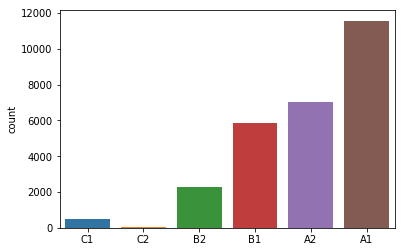

In [296]:
predictions = model.predict_classes(X)
classes = encoder.inverse_transform(predictions)


import seaborn as sns
import matplotlib.pyplot as plt

print(classes.shape)
sns.countplot(classes,label="Count")
plt.show()


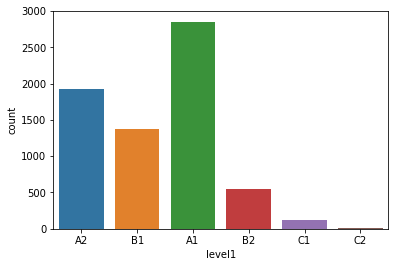

(6828,)

In [298]:
sns.countplot(y_test,label="Count")
plt.show()
y_test.shape